In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

In [2]:
def predict_logistic(coef,X):
    """
    Calculo matricial de uma função linear:
    
    X - matriz das observações; e
    coef - Variáveis da função calculada
    """
    
    X = np.asarray(X) ; coef = np.asarray(coef)
    return 1/ (1+np.exp(-X.dot(coef)))


def cost_logistic(theta,X,y):
    """
    Função custo que computa os desvios entre o dado observado e o calculado:
    X - Matriz das variáveis observadas (nxm : n - número de variáveis ; m - número de observações)
    y - Vetor de com as respostas esperadas (tamanho m) 
    """
    
    return -(y.dot(np.log(predict_logistic(theta,X))))-(1-y).dot(np.log(1-predict_logistic(theta,X)))

def gradient_descent_logistic(X,y,coef,alpha=0.01,ninter=100):

    coef = np.asarray(coef)
    cost_history = np.zeros(ninter) ; coef_history = np.zeros((ninter,len(coef)))
    
    for i in range(ninter):
        coef = coef- alpha*(X.T.dot((predict_logistic(coef,X))-y))*(2/len(y))
        coef_history[i,:] = coef
        cost_history[i] = cost_logistic(coef,X,y)
        
    return coef, cost_history, coef_history,X

### Gerando um dataset sintético

In [3]:
x = np.concatenate([np.random.normal(loc=-1,scale=0.5,size=30),np.random.normal(loc=1,scale=0.5,size=30)])
y= np.ones(60)
y[0:30] = 0

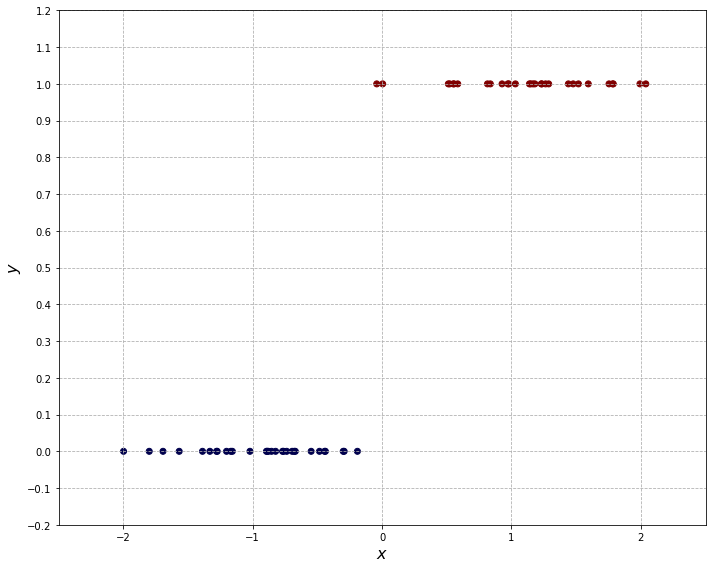

In [4]:
fig,axes = plt.subplots(figsize=(10,8))

axes.set_xlim(-2.5,2.5)

axes.set_yticks(np.arange(-0.2,1.3,0.1))
axes.set_ylim(-0.2,1.2)

axes.grid(ls='--')

axes.scatter(x,y,c=y,cmap='seismic')

axes.set_xlabel('$x$',fontsize=16)

axes.set_ylabel('$y$',fontsize=16)

fig.tight_layout()

fig.savefig('log_ex.png',dpi=300)

### Estimando os coeficientes iniciais (hipotese nula $\mathbf{w} = [0,0]$)

In [5]:
coef_ini= np.asarray([0,0])

In [6]:
X = np.stack((x,np.ones(len(x))),axis=1)

In [7]:
X

array([[-1.56791812,  1.        ],
       [-1.02097216,  1.        ],
       [-0.7688356 ,  1.        ],
       [-1.99783964,  1.        ],
       [-0.82290243,  1.        ],
       [-0.85459149,  1.        ],
       [-0.29321995,  1.        ],
       [-1.79938019,  1.        ],
       [-0.69516546,  1.        ],
       [-1.27412091,  1.        ],
       [-0.88796083,  1.        ],
       [-1.33085215,  1.        ],
       [-0.43817343,  1.        ],
       [-1.2021216 ,  1.        ],
       [-0.87921127,  1.        ],
       [-1.2792488 ,  1.        ],
       [-1.38777707,  1.        ],
       [-0.54809766,  1.        ],
       [-1.16920971,  1.        ],
       [-0.48372526,  1.        ],
       [-0.76203598,  1.        ],
       [-0.73721859,  1.        ],
       [-0.89373037,  1.        ],
       [-0.67059284,  1.        ],
       [-0.30017409,  1.        ],
       [-1.69306747,  1.        ],
       [-0.44376905,  1.        ],
       [-0.19069069,  1.        ],
       [-1.15711536,

In [8]:
cost_logistic(coef_ini,X,y)

41.58883083359672

### Obtendo os coeficientes da Regressão Logística

In [9]:
w_calc, cost_hist, w_hist,X = gradient_descent_logistic(X,y,coef_ini,0.1,ninter=200)

Text(0.5, 0, 'N. de iterações')

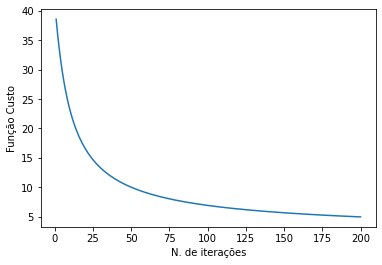

In [10]:
plt.plot(np.arange(1,len(cost_hist)+1),cost_hist)

plt.ylabel('Função Custo')
plt.xlabel('N. de iterações')

In [11]:
x_s = np.linspace(-2.5,2.5,100)

X = np.stack((x_s,np.ones(100)),axis=1)

No handles with labels found to put in legend.


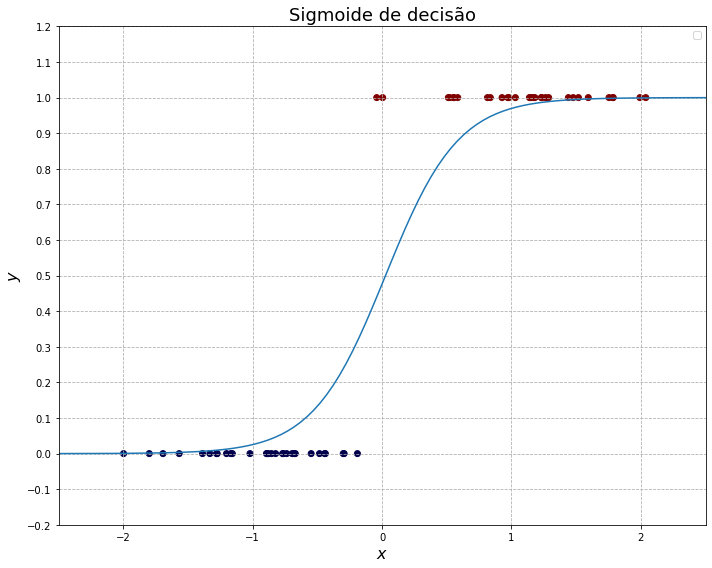

In [14]:
fig,axes = plt.subplots(figsize=(10,8))

axes.set_xlim(-2.5,2.5)

axes.set_yticks(np.arange(-0.2,1.3,0.1))
axes.set_ylim(-0.2,1.2)

axes.grid(ls='--')

axes.scatter(x,y,c=y,cmap='seismic')

axes.plot(x_s,predict_logistic(w_calc,X))

axes.set_xlabel('$x$',fontsize=16)

axes.set_ylabel('$y$',fontsize=16)

axes.set_title('Sigmoide de decisão',fontsize=18)

axes.legend()

fig.tight_layout()

fig.savefig('log_reg_clas.png',dpi=300)